In [2]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Carregando os dados
df = pd.read_csv('dataset.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.478,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.shape

(2938, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
df = pd.DataFrame({'country': df['Country'],
                   'life_expectancy': df['Life expectancy '],
                   'year': df['Year'],
                   'status': df['Status'],
                   'adult_mortality': df['Adult Mortality'],
                   'inf_death': df['infant deaths'],
                   'alcohol': df['Alcohol'],
                   'hepatitisB': df['Hepatitis B'],
                   'measles': df['Measles '],
                   'bmi': df[' BMI '],
                   'polio': df['Polio'],
                   'diphtheria': df['Diphtheria '],
                   'hiv': df[' HIV/AIDS'],
                   'gdp': df['GDP'],
                   'total_expenditure': df['Total expenditure'],
                   'thinness_till19': df[' thinness  1-19 years'],
                   'thinness_till9': df[' thinness 5-9 years'],
                   'school': df['Schooling'],
                   'population': df[' Population']})

In [9]:
df.columns

Index(['country', 'life_expectancy', 'year', 'status', 'adult_mortality',
       'inf_death', 'alcohol', 'hepatitisB', 'measles', 'bmi', 'polio',
       'diphtheria', 'hiv', 'gdp', 'total_expenditure', 'thinness_till19',
       'thinness_till9', 'school', 'population'],
      dtype='object')

In [10]:
df.dtypes

country               object
life_expectancy      float64
year                   int64
status                object
adult_mortality      float64
inf_death              int64
alcohol              float64
hepatitisB           float64
measles                int64
bmi                  float64
polio                float64
diphtheria           float64
hiv                  float64
gdp                  float64
total_expenditure    float64
thinness_till19      float64
thinness_till9       float64
school               float64
population           float64
dtype: object

In [11]:
df.shape

(2938, 19)

In [12]:
# Cria um dicionário com a descrição de cada variável
df_dict = {
    "country": "País de origem dos dados.",
    "life_expectancy": "Expectativa de vida ao nascer, em anos.",
    "year": "Ano em que os dados foram coletados.",
    "status": "Status de desenvolvimento do país ('Developing' para países em desenvolvimento, 'Developed' para países desenvolvidos).",
    "adult_mortality": "Taxa de mortalidade de adultos entre 15 e 60 anos por 1000 habitantes.",
    "inf_death": "Número de mortes de crianças com menos de 5 anos por 1000 nascidos vivos.",
    "alcohol": "Consumo de álcool per capita (litros de álcool puro por ano).",
    "hepatitisB": "Cobertura de vacinação contra hepatite B em crianças de 1 ano (%).",
    "measles": "Número de casos de sarampo relatados por 1000 habitantes.",
    "bmi": "Índice médio de massa corporal da população adulta.",
    "polio": "Cobertura de vacinação contra poliomielite em crianças de 1 ano (%).",
    "diphtheria": "Cobertura de vacinação contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano (%).",
    "hiv": "Prevalência de HIV na população adulta (%).",
    "gdp": "Produto Interno Bruto per capita (em dólares americanos).",
    "total_expenditure": "Gasto total em saúde como porcentagem do PIB.",
    "thinness_till19": "Prevalência de magreza em crianças e adolescentes de 10 a 19 anos (%).",
    "thinness_till9": "Prevalência de magreza em crianças de 5 a 9 anos (%).",
    "school": "Número médio de anos de escolaridade.",
    "population": "População total do país."
}

In [13]:
df_dict['adult_mortality']

'Taxa de mortalidade de adultos entre 15 e 60 anos por 1000 habitantes.'

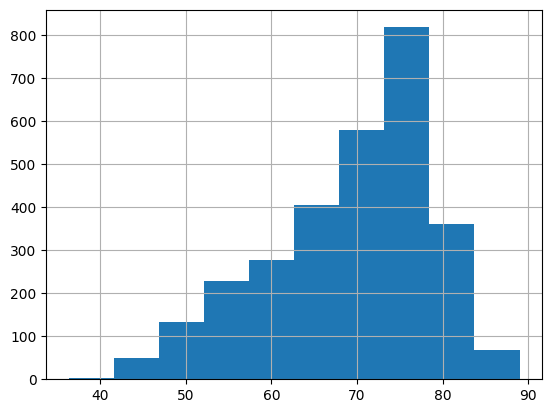

In [14]:
df['life_expectancy'].hist();

In [15]:
df.describe()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
count,2928.000000,2938.000000,2928.000000,2938.000000,2744.000000,2385.000000,2938.000000,2904.000000,2919.000000,2919.000000,2938.000000,2490.000000,2712.00000,2904.000000,2904.000000,2775.000000,2.286000e+03
mean,69.224932,2007.518720,164.796448,30.303948,4.602861,80.940461,2419.592240,38.321247,82.550188,82.324084,1.742103,7483.158469,5.93819,4.839704,4.870317,11.992793,1.275338e+07
std,9.523867,4.613841,124.292079,117.926501,4.052413,25.070016,11467.272489,20.044034,23.428046,23.716912,5.077785,14270.169342,2.49832,4.420195,4.508882,3.358920,6.101210e+07
min,36.300000,2000.000000,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000,3.000000,2.000000,0.100000,1.681350,0.37000,0.100000,0.100000,0.000000,3.400000e+01
25%,63.100000,2004.000000,74.000000,0.000000,0.877500,77.000000,0.000000,19.300000,78.000000,78.000000,0.100000,463.935626,4.26000,1.600000,1.500000,10.100000,1.957932e+05
50%,72.100000,2008.000000,144.000000,3.000000,3.755000,92.000000,17.000000,43.500000,93.000000,93.000000,0.100000,1766.947595,5.75500,3.300000,3.300000,12.300000,1.386542e+06
75%,75.700000,2012.000000,228.000000,22.000000,7.702500,97.000000,360.250000,56.200000,97.000000,97.000000,0.800000,5910.806335,7.49250,7.200000,7.200000,14.300000,7.420359e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.870000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.600000,119172.741800,17.60000,27.700000,28.600000,20.700000,1.293859e+09


In [16]:
def get_pairs(data, alvo, atributos, n):
        
    grupos_linhas = [atributos[i:i+n] for i in range(0, len(atributos), n)]

    for linha in grupos_linhas:
        plot = sns.pairplot(x_vars = linha, y_vars = alvo, data = data, kind = "reg", height = 3, )

    return

In [17]:
# Variável alvo
alvo = ['life_expectancy']

In [18]:
# Vamos usar alguns atributos
atributos = ['population', 'hepatitisB', 'gdp', 'total_expenditure', 'alcohol', 'school','adult_mortality'] 

In [19]:
atributos2 = [ 'life_expectancy', 'year', 'adult_mortality',
       'inf_death', 'alcohol', 'hepatitisB', 'measles', 'bmi', 'polio',
       'diphtheria', 'hiv', 'gdp', 'total_expenditure', 'thinness_till19',
       'thinness_till9', 'school', 'population']

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            2938 non-null   object 
 1   life_expectancy    2928 non-null   float64
 2   year               2938 non-null   int64  
 3   status             2938 non-null   object 
 4   adult_mortality    2928 non-null   float64
 5   inf_death          2938 non-null   int64  
 6   alcohol            2744 non-null   float64
 7   hepatitisB         2385 non-null   float64
 8   measles            2938 non-null   int64  
 9   bmi                2904 non-null   float64
 10  polio              2919 non-null   float64
 11  diphtheria         2919 non-null   float64
 12  hiv                2938 non-null   float64
 13  gdp                2490 non-null   float64
 14  total_expenditure  2712 non-null   float64
 15  thinness_till19    2904 non-null   float64
 16  thinness_till9     2904 

In [21]:
df_dict['adult_mortality']

'Taxa de mortalidade de adultos entre 15 e 60 anos por 1000 habitantes.'

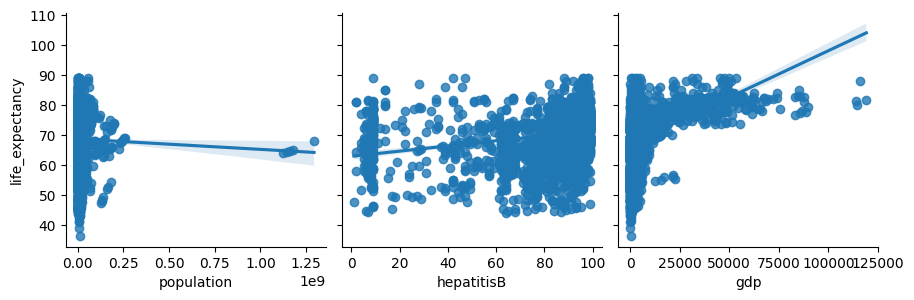

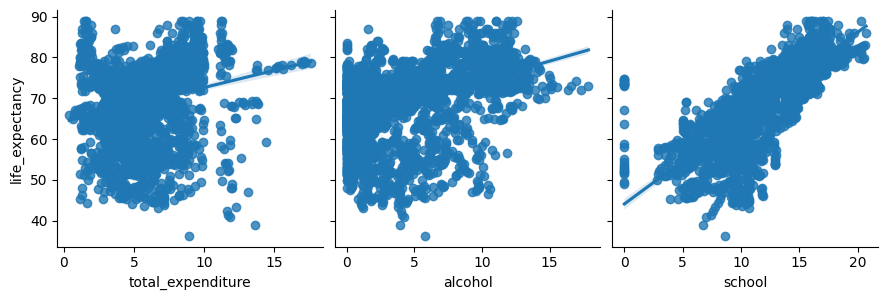

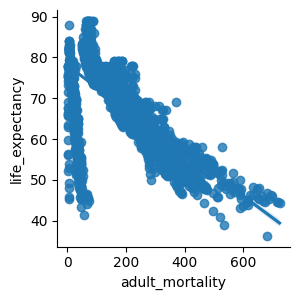

In [22]:
get_pairs(df, alvo, atributos, 3)

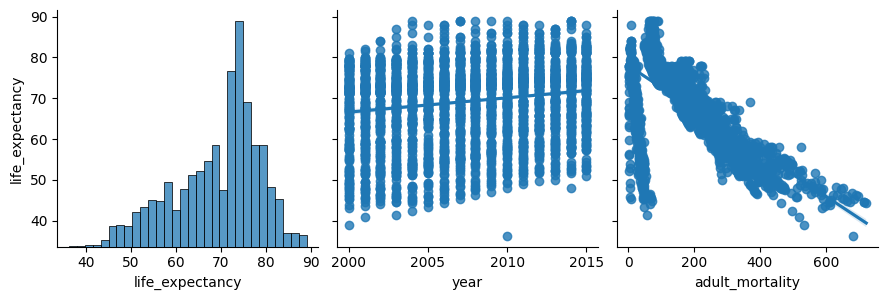

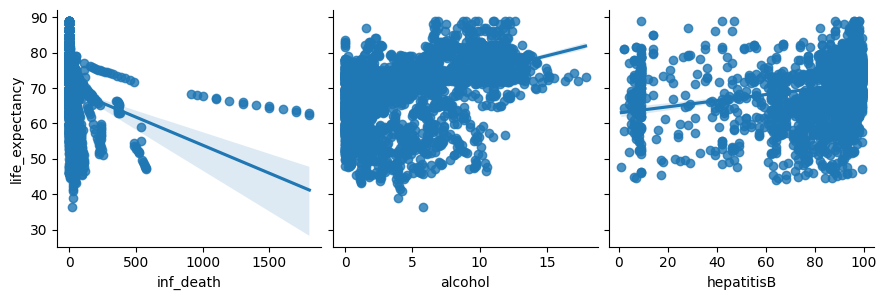

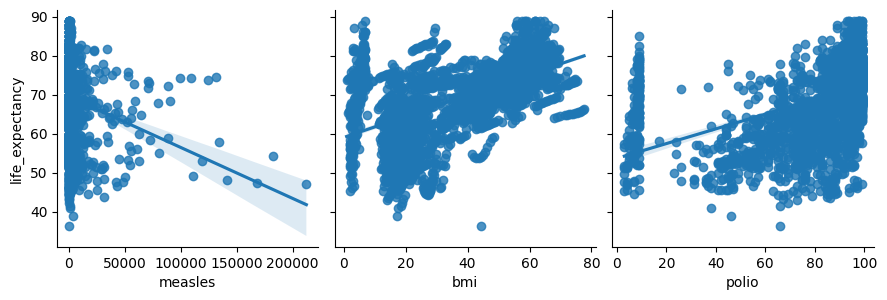

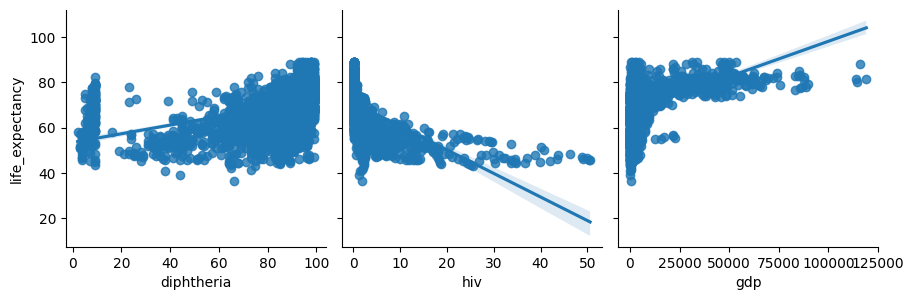

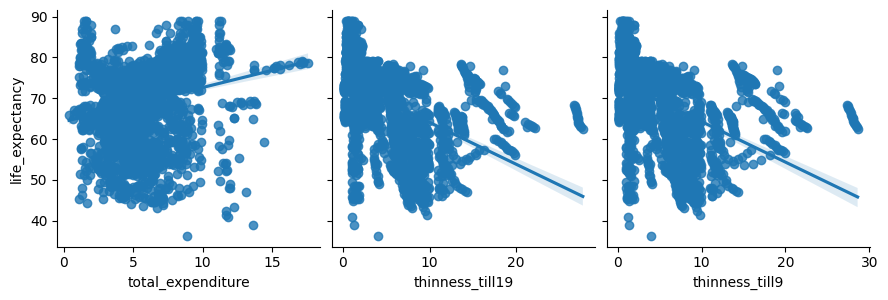

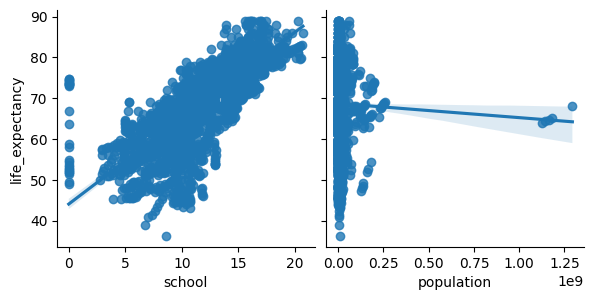

In [23]:
get_pairs(df, alvo, atributos2, 3)

In [24]:
# Visualizando o total de linhas por coluna
df.count()

country              2938
life_expectancy      2928
year                 2938
status               2938
adult_mortality      2928
inf_death            2938
alcohol              2744
hepatitisB           2385
measles              2938
bmi                  2904
polio                2919
diphtheria           2919
hiv                  2938
gdp                  2490
total_expenditure    2712
thinness_till19      2904
thinness_till9       2904
school               2775
population           2286
dtype: int64

In [25]:
valores_ausentes = (df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

In [26]:
valores_ausentes = valores_ausentes[valores_ausentes > 0  ]
valores_ausentes

population           22.191967
hepatitisB           18.822328
gdp                  15.248468
total_expenditure     7.692308
alcohol               6.603131
school                5.547992
thinness_till9        1.157250
thinness_till19       1.157250
bmi                   1.157250
polio                 0.646698
diphtheria            0.646698
life_expectancy       0.340368
adult_mortality       0.340368
dtype: float64

# Detectando Outliers

In [27]:
atributos = ['population', 'hepatitisB', 'gdp', 'total_expenditure', 'alcohol', 'school'] 

In [28]:
novo_dataframe = df[atributos]

In [29]:
# Identificação de outliers através do método do IQR (Interquartile Range)
Q1 = novo_dataframe.quantile(0.25)
Q3 = novo_dataframe.quantile(0.75)
IQR = Q3 - Q1

In [30]:
outliers = ((novo_dataframe < (Q1 - 1.5 * IQR)) | (novo_dataframe > (Q3 + 1.5 * IQR))).sum()

In [31]:
pd.DataFrame({'Outliers': outliers, 'Percentual': (outliers / len(novo_dataframe)) * 100})

,Outliers,Percentual
population,294,10.006807
hepatitisB,254,8.645337
gdp,365,12.423417
total_expenditure,32,1.089176
alcohol,0,0.000000
school,44,1.497617


# Tratamento de Outliers

In [32]:

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [33]:
novo_df = df[~((novo_dataframe < limite_inferior) | (novo_dataframe > limite_superior)).any(axis=1)]
novo_df.shape

(2044, 19)

In [34]:
novo_df.describe()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
count,2036.000000,2044.000000,2036.000000,2044.000000,1908.000000,1653.000000,2044.000000,2032.000000,2041.000000,2041.000000,2044.000000,1668.000000,1883.000000,2032.000000,2032.000000,1910.000000,1.550000e+03
mean,68.261444,2007.516634,173.697937,21.272016,4.250854,88.543860,2043.051859,37.229429,83.469868,84.229789,1.906115,2603.414714,5.817047,4.973327,5.039813,11.779791,2.862564e+06
std,9.180601,4.620838,124.821601,75.877341,3.821064,11.667147,11166.996177,19.540099,22.293545,20.802376,5.353430,3051.987902,2.167468,4.070398,4.188165,2.893174,4.147575e+06
min,36.300000,2000.000000,1.000000,0.000000,0.010000,47.000000,0.000000,1.000000,3.000000,3.000000,0.100000,3.685949,0.370000,0.100000,0.100000,3.800000,3.400000e+01
25%,62.475000,2003.000000,83.750000,0.000000,0.847500,84.000000,0.000000,19.200000,78.000000,81.000000,0.100000,387.645945,4.380000,1.900000,1.900000,10.100000,1.413295e+05
50%,71.400000,2008.000000,154.000000,3.000000,3.400000,93.000000,10.000000,41.300000,93.000000,93.000000,0.100000,1312.038142,5.710000,3.550000,3.600000,12.100000,8.968025e+05
75%,74.700000,2012.000000,235.000000,17.000000,6.725000,97.000000,256.250000,54.900000,97.000000,97.000000,1.000000,3936.450613,7.130000,7.325000,7.400000,13.700000,3.712494e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.310000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.300000,13893.187680,12.250000,27.700000,28.600000,20.400000,1.789956e+07


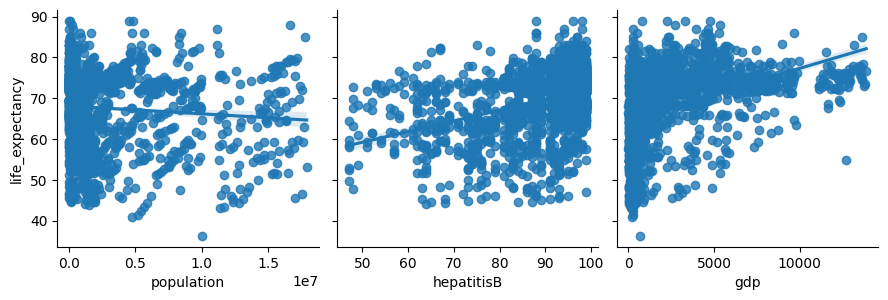

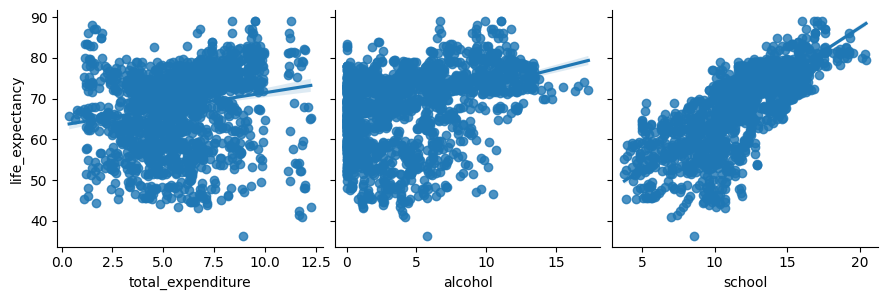

In [35]:
get_pairs(novo_df, alvo, atributos, 3)

# Tratando valores ausentes

In [36]:
valores_ausentes = novo_df.isnull().sum().sort_values(ascending = False)

In [37]:

valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / novo_df.shape[0] 
print(f'{valores_ausentes_percent * 100} %')

population           24.168297
hepatitisB           19.129159
gdp                  18.395303
total_expenditure     7.876712
alcohol               6.653620
school                6.555773
thinness_till9        0.587084
thinness_till19       0.587084
bmi                   0.587084
life_expectancy       0.391389
adult_mortality       0.391389
polio                 0.146771
diphtheria            0.146771
dtype: float64 %


In [38]:
# Utilizando a mediana -- depois testar com a média 
def impute_median(dados):
    return dados.fillna(dados.median())

In [39]:
novo_df.describe()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
count,2036.000000,2044.000000,2036.000000,2044.000000,1908.000000,1653.000000,2044.000000,2032.000000,2041.000000,2041.000000,2044.000000,1668.000000,1883.000000,2032.000000,2032.000000,1910.000000,1.550000e+03
mean,68.261444,2007.516634,173.697937,21.272016,4.250854,88.543860,2043.051859,37.229429,83.469868,84.229789,1.906115,2603.414714,5.817047,4.973327,5.039813,11.779791,2.862564e+06
std,9.180601,4.620838,124.821601,75.877341,3.821064,11.667147,11166.996177,19.540099,22.293545,20.802376,5.353430,3051.987902,2.167468,4.070398,4.188165,2.893174,4.147575e+06
min,36.300000,2000.000000,1.000000,0.000000,0.010000,47.000000,0.000000,1.000000,3.000000,3.000000,0.100000,3.685949,0.370000,0.100000,0.100000,3.800000,3.400000e+01
25%,62.475000,2003.000000,83.750000,0.000000,0.847500,84.000000,0.000000,19.200000,78.000000,81.000000,0.100000,387.645945,4.380000,1.900000,1.900000,10.100000,1.413295e+05
50%,71.400000,2008.000000,154.000000,3.000000,3.400000,93.000000,10.000000,41.300000,93.000000,93.000000,0.100000,1312.038142,5.710000,3.550000,3.600000,12.100000,8.968025e+05
75%,74.700000,2012.000000,235.000000,17.000000,6.725000,97.000000,256.250000,54.900000,97.000000,97.000000,1.000000,3936.450613,7.130000,7.325000,7.400000,13.700000,3.712494e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.310000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.300000,13893.187680,12.250000,27.700000,28.600000,20.400000,1.789956e+07


In [40]:
novo_df.loc[:,'population'] = novo_df['population'].transform(impute_median)
novo_df.hepatitisB = novo_df['hepatitisB'].transform(impute_median)
novo_df.alcohol = novo_df['alcohol'].transform(impute_median)
novo_df.total_expenditure = novo_df['total_expenditure'].transform(impute_median)
novo_df.gdp = novo_df['gdp'].transform(impute_median)
novo_df.school = novo_df['school'].transform(impute_median)

In [41]:
valores_ausentes = novo_df.isnull().sum().sort_values(ascending = False)

In [42]:
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / novo_df.shape[0] 
print(f'{valores_ausentes_percent * 100} %')

bmi                0.587084
thinness_till9     0.587084
thinness_till19    0.587084
adult_mortality    0.391389
life_expectancy    0.391389
diphtheria         0.146771
polio              0.146771
dtype: float64 %


In [43]:
novo_df.dropna(inplace=True)

In [44]:
# Drop das variáveis, pois não faremos a analise conforme o país
novo_df.drop(['country', 'status'], axis = 1, inplace = True)

In [45]:
df.shape

(2938, 19)

In [46]:
novo_df.shape

(2023, 17)

# Engenharia de Recursos (Feature Engineering)

In [47]:
novo_df.describe()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
count,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2023.000000,2.023000e+03
mean,68.305932,2007.493327,173.094414,21.245675,4.217973,89.369748,2047.873950,37.139348,83.525457,84.279783,1.917350,2378.640667,5.812753,4.983836,5.050618,11.827533,2.396953e+06
std,9.181365,4.612891,124.864542,76.215994,3.703510,10.661258,11221.258524,19.443117,22.271840,20.809313,5.378127,2812.284710,2.079036,4.069306,4.187353,2.776081,3.724564e+06
min,36.300000,2000.000000,1.000000,0.000000,0.010000,47.000000,0.000000,1.000000,3.000000,3.000000,0.100000,3.685949,0.370000,0.100000,0.100000,3.800000,3.400000e+01
25%,62.600000,2003.000000,83.000000,0.000000,1.080000,87.000000,0.000000,19.200000,78.500000,81.000000,0.100000,494.347805,4.515000,1.900000,1.900000,10.300000,3.046160e+05
50%,71.400000,2008.000000,154.000000,3.000000,3.400000,93.000000,10.000000,41.300000,93.000000,93.000000,0.100000,1312.038142,5.710000,3.600000,3.600000,12.100000,8.968025e+05
75%,74.700000,2011.000000,233.500000,17.000000,6.560000,96.000000,245.000000,54.800000,97.000000,97.000000,1.000000,3367.982302,6.925000,7.400000,7.400000,13.500000,2.432418e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.310000,99.000000,212183.000000,77.600000,99.000000,99.000000,50.300000,13893.187680,12.250000,27.700000,28.600000,20.400000,1.789956e+07


In [48]:
novo_df['population'].min()

34.0

In [49]:
novo_df['population'].max()

17899562.0

In [50]:
# Criando novos categorias para a população, devida a alta variação de dados 
# Criando os pontos de cortes (cutoffs) com 2 percentis como  referencia 

pontos_corte = [novo_df['population'].quantile(0.33),novo_df['population'].quantile(0.66) ]

In [51]:
pontos_corte

[656519.86, 1277374.1199999999]

In [52]:
novo_df['pop_size'] = 1

In [53]:
novo_df.loc[(novo_df['population'] > pontos_corte[0]) & (novo_df['population'] < pontos_corte[1]), 'pop_size'] = 2 

In [54]:
novo_df.loc[(novo_df['population']) >= pontos_corte[1],'pop_size'] = 3

In [55]:
novo_df.head()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population,pop_size
1,59.9,2014,271.0,64,0.01,62.0,492,18.6,58.0,62.0,0.1,612.696514,8.18,17.5,17.5,10.0,327582.0,1
3,59.5,2012,272.0,69,0.01,67.0,2787,17.6,67.0,67.0,0.1,669.959000,8.52,17.9,18.0,9.8,3696958.0,3
4,59.2,2011,275.0,71,0.01,68.0,3013,17.2,68.0,68.0,0.1,63.537231,7.87,18.2,18.2,9.5,2978599.0,3
5,58.8,2010,279.0,74,0.01,66.0,1989,16.7,66.0,66.0,0.1,553.328940,9.20,18.4,18.4,9.2,2883167.0,3
6,58.6,2009,281.0,77,0.01,63.0,2861,16.2,63.0,63.0,0.1,445.893298,9.42,18.6,18.7,8.9,284331.0,1


In [56]:
novo_df.pop_size.value_counts()

3    688
1    668
2    667
Name: pop_size, dtype: int64

In [57]:
novo_df['lifestyle'] = novo_df['bmi'] * novo_df['alcohol']


In [58]:
df_dict['bmi']

'Índice médio de massa corporal da população adulta.'

In [59]:
novo_df.head()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population,pop_size,lifestyle
1,59.9,2014,271.0,64,0.01,62.0,492,18.6,58.0,62.0,0.1,612.696514,8.18,17.5,17.5,10.0,327582.0,1,0.186
3,59.5,2012,272.0,69,0.01,67.0,2787,17.6,67.0,67.0,0.1,669.959000,8.52,17.9,18.0,9.8,3696958.0,3,0.176
4,59.2,2011,275.0,71,0.01,68.0,3013,17.2,68.0,68.0,0.1,63.537231,7.87,18.2,18.2,9.5,2978599.0,3,0.172
5,58.8,2010,279.0,74,0.01,66.0,1989,16.7,66.0,66.0,0.1,553.328940,9.20,18.4,18.4,9.2,2883167.0,3,0.167
6,58.6,2009,281.0,77,0.01,63.0,2861,16.2,63.0,63.0,0.1,445.893298,9.42,18.6,18.7,8.9,284331.0,1,0.162


In [60]:
novo_df['lifestyle'].describe()

count    2023.000000
mean      178.996408
std       209.416553
min         0.018000
25%        18.140500
50%        95.323000
75%       257.394000
max      1036.869000
Name: lifestyle, dtype: float64

In [61]:
novo_df.isnull().sum().sum()

0

# Análise de Correlação para verificação Multicolineatidade 

In [62]:
novo_df.corr()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population,pop_size,lifestyle
life_expectancy,1.000000,0.204556,-0.658916,-0.206443,0.342425,0.257860,-0.115350,0.557954,0.452564,0.483659,-0.573127,0.360736,0.175738,-0.433580,-0.429357,0.708272,-0.105317,-0.120691,0.441366
year,0.204556,1.000000,-0.091760,-0.059838,-0.066639,-0.003178,-0.064347,0.096763,0.147489,0.228939,-0.158820,0.170945,0.070267,-0.059353,-0.055950,0.219471,0.020981,0.011016,-0.017373
adult_mortality,-0.658916,-0.091760,1.000000,0.099370,-0.149204,-0.188950,0.035432,-0.366745,-0.228938,-0.221803,0.512978,-0.197863,-0.090963,0.299104,0.302507,-0.383901,0.096768,0.119706,-0.231128
inf_death,-0.206443,-0.059838,0.099370,1.000000,-0.127545,-0.122515,0.480129,-0.221948,-0.183569,-0.183910,0.039115,-0.120331,-0.121871,0.321487,0.354512,-0.214215,0.111901,0.115855,-0.156769
alcohol,0.342425,-0.066639,-0.149204,-0.127545,1.000000,0.193844,-0.045324,0.310448,0.187916,0.199958,-0.036268,0.289360,0.262657,-0.386629,-0.379482,0.464657,-0.007040,0.002495,0.878858
hepatitisB,0.257860,-0.003178,-0.188950,-0.122515,0.193844,1.000000,-0.043089,0.115409,0.393191,0.391270,-0.090390,0.167829,0.046093,-0.086406,-0.102546,0.263879,-0.056455,-0.032766,0.181579
measles,-0.115350,-0.064347,0.035432,0.480129,-0.045324,-0.043089,1.000000,-0.142187,-0.110853,-0.123043,0.024412,-0.065666,-0.101675,0.133515,0.137056,-0.089084,-0.005326,0.027998,-0.085123
bmi,0.557954,0.096763,-0.366745,-0.221948,0.310448,0.115409,-0.142187,1.000000,0.253961,0.273612,-0.244626,0.323198,0.200959,-0.541904,-0.550691,0.552766,-0.056945,-0.046032,0.599062
polio,0.452564,0.147489,-0.228938,-0.183569,0.187916,0.393191,-0.110853,0.253961,1.000000,0.676507,-0.143756,0.198453,0.141294,-0.166819,-0.166363,0.382712,-0.045542,-0.043755,0.219793
diphtheria,0.483659,0.228939,-0.221803,-0.183910,0.199958,0.391270,-0.123043,0.273612,0.676507,1.000000,-0.154179,0.222266,0.157976,-0.189487,-0.186992,0.430627,-0.035142,-0.037661,0.225132


In [63]:
df_corre = novo_df.corr()
df_filtrado1 = df_corre[((df_corre >= 0.3) | (df_corre <= -0.3)) & (df_corre != 1.000)]
df_filtrado1


,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population,pop_size,lifestyle
life_expectancy,NaN,NaN,-0.658916,NaN,0.342425,NaN,NaN,0.557954,0.452564,0.483659,-0.573127,0.360736,NaN,-0.433580,-0.429357,0.708272,NaN,NaN,0.441366
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adult_mortality,-0.658916,NaN,NaN,NaN,NaN,NaN,NaN,-0.366745,NaN,NaN,0.512978,NaN,NaN,NaN,0.302507,-0.383901,NaN,NaN,NaN
inf_death,NaN,NaN,NaN,NaN,NaN,NaN,0.480129,NaN,NaN,NaN,NaN,NaN,NaN,0.321487,0.354512,NaN,NaN,NaN,NaN
alcohol,0.342425,NaN,NaN,NaN,NaN,NaN,NaN,0.310448,NaN,NaN,NaN,NaN,NaN,-0.386629,-0.379482,0.464657,NaN,NaN,0.878858
hepatitisB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.393191,0.391270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
measles,NaN,NaN,NaN,0.480129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,0.557954,NaN,-0.366745,NaN,0.310448,NaN,NaN,NaN,NaN,NaN,NaN,0.323198,NaN,-0.541904,-0.550691,0.552766,NaN,NaN,0.599062
polio,0.452564,NaN,NaN,NaN,NaN,0.393191,NaN,NaN,NaN,0.676507,NaN,NaN,NaN,NaN,NaN,0.382712,NaN,NaN,NaN
diphtheria,0.483659,NaN,NaN,NaN,NaN,0.391270,NaN,NaN,0.676507,NaN,NaN,NaN,NaN,NaN,NaN,0.430627,NaN,NaN,NaN


Vamos manter todas variaveis que tem uma correlação "alta" com o alvo, de acordo o critério acima 

In [64]:
# Filtrando a matriz de correlação
dfCorr = novo_df.corr()
df_filtro_2 = dfCorr[((dfCorr >= 0.65) | (dfCorr <= -0.65)) & (dfCorr != 1.000)]
df_filtro_2 = df_filtro_2.drop('life_expectancy', axis=1)
df_filtro_2 = df_filtro_2.drop('life_expectancy', axis=0)
df_filtro_2

,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population,pop_size,lifestyle
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adult_mortality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inf_death,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alcohol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.878858
hepatitisB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
measles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
polio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.676507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diphtheria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.676507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hiv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Conforme os critérios acima, vamos exluir as variaveis que tem uma alta relação.
Será exluida a variavel que tiver a menor correlação com o alvo

### Decisão

**Primeiro Filtro - Correlação com a Variável Alvo**

As variáveis adult_mortality, alcohol, bmi, polio, diphtheria, hiv, gdp, thinness_till19, thinness_till9, school e lifestyle atendem ao nosso primeiro critério. São as variáveis preditoras com maior correlação com a variável alvo.

**Segundo Filtro - Multicolinearidade**

Com base no filtro de multicolinearidade, as variáveis adult_mortality, diphtheria, hiv, gdp, thinness_till19, school e lifestyle serão as variáveis mantidas para a modelagem estatística.

**Terceiro Filtro - Compreensão dos Dados, do Problema de Negócio e Entrega dos Resultados**

Embora a variável bmi tenha maior correlação com a variável alvo do que a variável lifestyle, esta segunda carrega informação de duas variáveis (alcohol e bmi). 

In [65]:
# Preparando o novo dataset
novo_df_final = pd.DataFrame({'life_expectancy': novo_df['life_expectancy'],
                              'adult_mortality': novo_df['adult_mortality'],
                              'diphtheria': novo_df['diphtheria'],
                              'hiv': novo_df['hiv'],
                              'gdp': novo_df['gdp'],
                              'thinness_till19': novo_df['thinness_till19'],
                              'school': novo_df['school'],
                              'lifestyle': novo_df['lifestyle'],})

In [66]:
novo_df_final.head()

,life_expectancy,adult_mortality,diphtheria,hiv,gdp,thinness_till19,school,lifestyle
1,59.9,271.0,62.0,0.1,612.696514,17.5,10.0,0.186
3,59.5,272.0,67.0,0.1,669.959000,17.9,9.8,0.176
4,59.2,275.0,68.0,0.1,63.537231,18.2,9.5,0.172
5,58.8,279.0,66.0,0.1,553.328940,18.4,9.2,0.167
6,58.6,281.0,63.0,0.1,445.893298,18.6,8.9,0.162


In [67]:
novo_df_final.isnull().sum().sort_values(ascending = False)

life_expectancy    0
adult_mortality    0
diphtheria         0
hiv                0
gdp                0
thinness_till19    0
school             0
lifestyle          0
dtype: int64

In [68]:
# Checando multicolinearidade e removendo varáveis altamente correlacionadas
corr_map = novo_df_final.corr()
corr_map

,life_expectancy,adult_mortality,diphtheria,hiv,gdp,thinness_till19,school,lifestyle
life_expectancy,1.000000,-0.658916,0.483659,-0.573127,0.360736,-0.433580,0.708272,0.441366
adult_mortality,-0.658916,1.000000,-0.221803,0.512978,-0.197863,0.299104,-0.383901,-0.231128
diphtheria,0.483659,-0.221803,1.000000,-0.154179,0.222266,-0.189487,0.430627,0.225132
hiv,-0.573127,0.512978,-0.154179,1.000000,-0.118378,0.212890,-0.232993,-0.132152
gdp,0.360736,-0.197863,0.222266,-0.118378,1.000000,-0.211979,0.460247,0.333733
thinness_till19,-0.433580,0.299104,-0.189487,0.212890,-0.211979,1.000000,-0.424922,-0.449094
school,0.708272,-0.383901,0.430627,-0.232993,0.460247,-0.424922,1.000000,0.528939
lifestyle,0.441366,-0.231128,0.225132,-0.132152,0.333733,-0.449094,0.528939,1.000000


In [69]:
# Função para o plot da matriz de correlação
def CorrMat(df, dropDuplicates = True, xrot = 70, yrot = 0, label = 'Variable'):

    # Excluir correlações duplicadas mascarando os valores superiores à direita
    if dropDuplicates:
        mask = np.zeros_like(df, dtype = bool)
        mask[np.triu_indices_from(mask)] = True

    # Definir cor do plano de fundo / estilo do gráfico
    sns.set_style(style = 'dark')
    fig, ax = plt.subplots(figsize = (8, 8))

    # Adiciona mapa de cores do vermelho ao azul
    plt.title("Matriz de Correlação")

    # Desenha gráfico de correlação com ou sem duplicatas
    if dropDuplicates:
        sns.heatmap(df, mask = mask, square = True, linewidth = .5, cbar_kws = {"shrink": .5}, ax = ax)
        plt.xlabel(label)
        plt.ylabel(label)
        plt.xticks(rotation=xrot)
        plt.yticks(rotation=yrot)

    else:
        sns.heatmap(df, square = True, linewidth = .5, cbar_kws = {"shrink": .5}, ax = ax)
        plt.xlabel(label)
        plt.ylabel(label)
        plt.xticks(rotation = xrot)
        plt.yticks(rotation = yrot)
    return

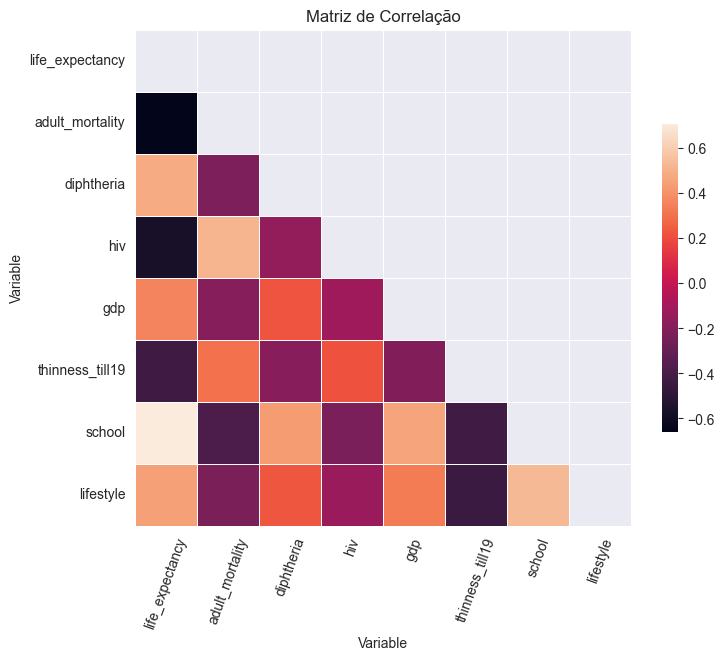

In [70]:
# Plot da matriz de correlação
CorrMat(corr_map)

In [71]:
novo_df_final.columns

Index(['life_expectancy', 'adult_mortality', 'diphtheria', 'hiv', 'gdp',
       'thinness_till19', 'school', 'lifestyle'],
      dtype='object')

Analisando a relação dos dados - Modelagem estatística 

In [72]:
formula = 'life_expectancy ~ adult_mortality + diphtheria + hiv + gdp + thinness_till19 + school + lifestyle'

In [73]:
modelo_v1 = ols(formula, data = novo_df_final).fit()

In [74]:
# Coeficiente de Determinação
print(f"R-squared: {modelo_v1.rsquared}")

R-squared: 0.7737705044839867


In [75]:
print(f"Coeficientes:\n{modelo_v1.params}")

Coeficientes:
Intercept          51.016574
adult_mortality    -0.021286
diphtheria          0.079267
hiv                -0.484974
gdp                 0.000062
thinness_till19    -0.127453
school              1.289512
lifestyle           0.002567
dtype: float64


In [76]:
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     984.6
Date:                Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:51:54   Log-Likelihood:                -5852.1
No. Observations:                2023   AIC:                         1.172e+04
Df Residuals:                    2015   BIC:                         1.177e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          51.0166      0.667     76.474      0.000      49.708      52.325
adult_mortality    -0.0213      0.001    -22.068      0.000      -0.023      -0.019
diphtheria          0.0793      0.005     15.252      0.000       0.069       0.089
hiv                -0.4850      0.021    -22.928      0.000      -0.526      -0.443
gdp              6.181e-05   3.93e-05      1.574      0.116   -1.52e-05       0.000
thinness_till19    -0.1275      0.028     -4.546      0.000      -0.182      -0.072
school              1.2895      0.049     26.065      0.000       1.192       1.387
lifestyle           0.0026      0.001      4.451      0.000       0.001       0.004
==============================================================================
Omnibus:                      105.060   Durbin-Watson:                   0.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.134
Skew:                          -0.383   Prob(JB):                     6.99e-43
Kurtosis:                       4.310   Cond. No.                     2.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
# No modelo_v1 a variavel apresentou um valor-p supereio a 0.05, portanto, não é estatisticamente significativa para a varaivel alvo

In [78]:
formula = 'life_expectancy ~ adult_mortality + diphtheria + hiv + thinness_till19 + school + lifestyle'
modelo_v2 = ols(formula, data = novo_df_final).fit()
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     1147.
Date:                Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:51:54   Log-Likelihood:                -5853.3
No. Observations:                2023   AIC:                         1.172e+04
Df Residuals:                    2016   BIC:                         1.176e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          50.8445      0.658     77.233      0.000      49.553      52.136
adult_mortality    -0.0213      0.001    -22.094      0.000      -0.023      -0.019
diphtheria          0.0795      0.005     15.299      0.000       0.069       0.090
hiv                -0.4850      0.021    -22.922      0.000      -0.527      -0.444
thinness_till19    -0.1266      0.028     -4.515      0.000      -0.182      -0.072
school              1.3132      0.047     27.859      0.000       1.221       1.406
lifestyle           0.0027      0.001      4.671      0.000       0.002       0.004
==============================================================================
Omnibus:                      108.281   Durbin-Watson:                   0.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.828
Skew:                          -0.394   Prob(JB):                     4.05e-44
Kurtosis:                       4.323   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
df_corre = novo_df_final.corr()

In [80]:
df_corre[(df_corre < -0.65) | (df_corre > 0.65)] 

,life_expectancy,adult_mortality,diphtheria,hiv,gdp,thinness_till19,school,lifestyle
life_expectancy,1.000000,-0.658916,NaN,NaN,NaN,NaN,0.708272,NaN
adult_mortality,-0.658916,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
diphtheria,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
hiv,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
gdp,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
thinness_till19,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
school,0.708272,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
lifestyle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [81]:
# Variáveis que serão padronizadas
atributos = ['adult_mortality', 'diphtheria', 'hiv', 'thinness_till19', 'school', 'lifestyle'] 

In [82]:
sclater = StandardScaler()
sclater.fit(novo_df_final[atributos])
scaled_feature = sclater.transform(novo_df_final[atributos])

In [83]:
scaled_feature

array([[ 0.78428825, -1.07092872, -0.33799866,  3.07650976, -0.65847692,
        -0.85406152],
       [ 0.79229891, -0.83059228, -0.33799866,  3.17483093, -0.73053874,
        -0.85410928],
       [ 0.81633088, -0.78252499, -0.33799866,  3.2485718 , -0.83863148,
        -0.85412838],
       ...,
       [-0.80182221, -0.63832313,  7.04557806, -0.93007793, -0.65847692,
        -0.29846188],
       [ 4.10871168, -0.44605398,  7.47334195, -0.83175676, -0.73053874,
        -0.64217297],
       [ 3.94048784, -0.30185211,  7.73371997,  1.47879074, -0.73053874,
        -0.65033098]])

In [84]:
scaled_features_df = pd.DataFrame(scaled_feature, columns=atributos, index=novo_df_final.index)
scaled_features_df.head()

,adult_mortality,diphtheria,hiv,thinness_till19,school,lifestyle
1,0.784288,-1.070929,-0.337999,3.076510,-0.658477,-0.854062
3,0.792299,-0.830592,-0.337999,3.174831,-0.730539,-0.854109
4,0.816331,-0.782525,-0.337999,3.248572,-0.838631,-0.854128
5,0.848374,-0.878660,-0.337999,3.297732,-0.946724,-0.854152
6,0.864395,-1.022861,-0.337999,3.346893,-1.054817,-0.854176


In [85]:
# Terceira versão do modelo
modelo_v3 = sm.OLS(endog = novo_df_final['life_expectancy'], 
                   exog = sm.add_constant(scaled_features_df.values)).fit()

In [86]:
modelo_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     1147.
Date:                Fri, 22 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:51:54   Log-Likelihood:                -5853.3
No. Observations:                2023   AIC:                         1.172e+04
Df Residuals:                    2016   BIC:                         1.176e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.3059      0.097    702.041      0.000      68.115      68.497
x1            -2.6608      0.120    -22.094      0.000      -2.897      -2.425
x2             1.6541      0.108     15.299      0.000       1.442       1.866
x3            -2.6080      0.114    -22.922      0.000      -2.831      -2.385
x4            -0.5151      0.114     -4.515      0.000      -0.739      -0.291
x5             3.6447      0.131     27.859      0.000       3.388       3.901
x6             0.5602      0.120      4.671      0.000       0.325       0.795
==============================================================================
Omnibus:                      108.281   Durbin-Watson:                   0.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.828
Skew:                          -0.394   Prob(JB):                     4.05e-44
Kurtosis:                       4.323   Cond. No.                         2.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
modelo_v3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.773     
Dependent Variable: life_expectancy  AIC:                11720.6099
Date:               2024-11-22 09:51 BIC:                11759.8962
No. Observations:   2023             Log-Likelihood:     -5853.3   
Df Model:           6                F-statistic:        1147.     
Df Residuals:       2016             Prob (F-statistic): 0.00      
R-squared:          0.773            Scale:              19.151    
---------------------------------------------------------------------
            Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const      68.3059     0.0973   702.0410   0.0000   68.1151   68.4967
x1         -2.6608     0.1204   -22.0938   0.0000   -2.8970   -2.4246
x2          1.6541     0.1081    15.2990   0.0000    1.4420    1.8661
x3         -2.6080     0.1138   -22.9224   0.0000   -2.8311   -2.3848
x4         -0.5151     0.1141    -4.5152   0.0000   -0.7388   -0.2914
x5          3.6447     0.1308    27.8589   0.0000    3.3881    3.9013
x6          0.5602     0.1199     4.6712   0.0000    0.3250    0.7954
-------------------------------------------------------------------
Omnibus:              108.281       Durbin-Watson:          0.676  
Prob(Omnibus):        0.000         Jarque-Bera (JB):       199.828
Skew:                 -0.394        Prob(JB):               0.000  
Kurtosis:             4.323         Condition No.:          3      
===================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors
is correctly specified.
"""

In [88]:
novo_df_final.corr()

,life_expectancy,adult_mortality,diphtheria,hiv,gdp,thinness_till19,school,lifestyle
life_expectancy,1.000000,-0.658916,0.483659,-0.573127,0.360736,-0.433580,0.708272,0.441366
adult_mortality,-0.658916,1.000000,-0.221803,0.512978,-0.197863,0.299104,-0.383901,-0.231128
diphtheria,0.483659,-0.221803,1.000000,-0.154179,0.222266,-0.189487,0.430627,0.225132
hiv,-0.573127,0.512978,-0.154179,1.000000,-0.118378,0.212890,-0.232993,-0.132152
gdp,0.360736,-0.197863,0.222266,-0.118378,1.000000,-0.211979,0.460247,0.333733
thinness_till19,-0.433580,0.299104,-0.189487,0.212890,-0.211979,1.000000,-0.424922,-0.449094
school,0.708272,-0.383901,0.430627,-0.232993,0.460247,-0.424922,1.000000,0.528939
lifestyle,0.441366,-0.231128,0.225132,-0.132152,0.333733,-0.449094,0.528939,1.000000


In [89]:
df_dict['diphtheria']

'Cobertura de vacinação contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano (%).'

In [90]:
df_dict['adult_mortality']

'Taxa de mortalidade de adultos entre 15 e 60 anos por 1000 habitantes.'

In [91]:
df_dict['gdp']

'Produto Interno Bruto per capita (em dólares americanos).'

# Conclusão 

Tivemos uma boa eficiencia do modelo, demonstrando ter 77% de explicação do nosso alvo. 
Isso indica um alto grau de precisão , levando em consideração os dados que foram entregue.

Impacto com da saude
* a cobertura de vacinação contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano, escolaridade e estilo de vida (consumo de alcool * indide de gordura corporal) tem uma forte correlação positiva com o a expectativa de vida
* por outro lado, as variaveis 'HIV', magreza aos 19anos e mortalidade adulta, tem uma forte correlação negativa com a varaivel alvo, em outras palavras, enquanto uma aumenta a outra desce.

Recomendações:
* Ampliar os projetos sociais para conscientização sobre o uso de métodos preventivos, visando reduzir os índices de HIV.
* Investir em campanhas de vacianção 
* Incentivar a prática de esportes.



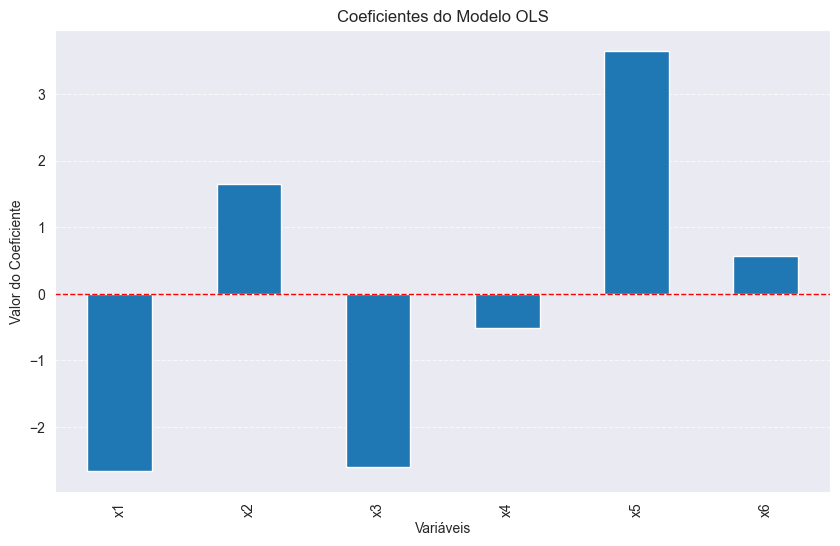

In [95]:
import matplotlib.pyplot as plt

# Criar um gráfico de barras com os coeficientes
coeficientes = modelo_v3.params
plt.figure(figsize=(10, 6))
coeficientes.drop('const').plot(kind='bar')  # Excluindo o intercepto ('const') para focar nas variáveis
plt.title("Coeficientes do Modelo OLS")
plt.xlabel("Variáveis")
plt.ylabel("Valor do Coeficiente")
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [99]:
atributos = ['const','adult_mortality', 'diphtheria', 'hiv', 'thinness_till19', 'school', 'lifestyle'] 

In [100]:
pd.DataFrame(modelo_v3.params)

,0
const,68.305932
x1,-2.660808
x2,1.654054
x3,-2.607951
x4,-0.515090
x5,3.644721
x6,0.560173


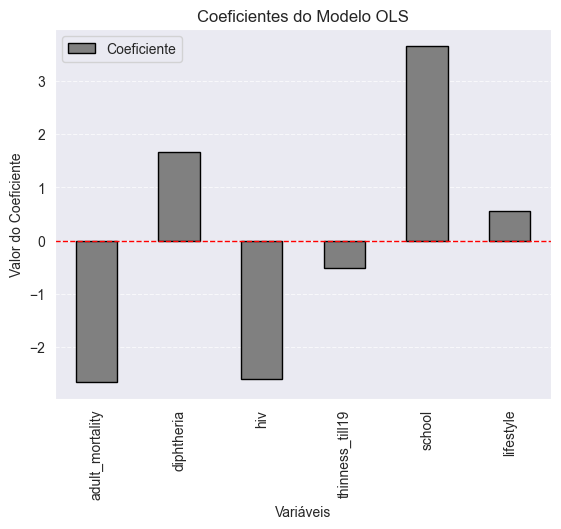

In [102]:
coef_df.drop('const').plot(kind='bar', color='grey', edgecolor='black')
plt.title("Coeficientes do Modelo OLS")
plt.xlabel("Variáveis")
plt.ylabel("Valor do Coeficiente")
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()